In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19eda/fifa_eda.csv


In [2]:
df = pd.read_csv("../input/fifa19eda/fifa_eda.csv")
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
df.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [4]:
df.shape

(18207, 18)

In [5]:
df = df.dropna()

In [6]:
df.isna().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

In [7]:
df.sample(3)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
14972,209024,A. Barry,25,Republic of Ireland,60,64,Cork City,230.0,1.0,Left,1.0,2.0,CB,2017,2019-01-01,5.916667,170.0,374.0
5574,235754,Borja Herrera,25,Spain,70,75,CF Reus Deportiu,2000.0,5.0,Left,1.0,3.0,LB,2018,2021-01-01,5.750000,154.0,3200.0
15804,229878,C. Lattanzio,20,Argentina,59,70,Estudiantes de La Plata,270.0,2.0,Left,1.0,2.0,LM,2017,2020-01-01,5.583333,141.0,459.0


In [8]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

1. Top 5 countires with highest number of football players?
2. Top 5 oldest players and top 10 youngest players?
3. line plot on age 
4. which player plays for highest club
5. clubs with highest number of player
6. Clubs with lowest number of player
7. clubs with youngest/oldest numbers of players
8. players with highest/lowest wage
9. Which club has highest/lowest average wage
10. Which team has left Preferred Foot/right
11. Which player has big / short height 
12. Which player has more weight 
13. Which player has high International Reputation
14. Most famous Position
15. Which player/club has most skill moves
16. Which position has International Reputation	Skill Moves more Position

In [9]:
top_5_countries = df['Nationality'].value_counts().head()
top_5_countries

England      1655
Germany      1195
Spain        1071
Argentina     935
France        910
Name: Nationality, dtype: int64

<AxesSubplot:>

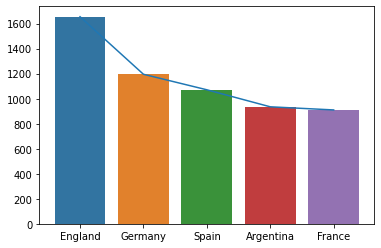

In [10]:
sns.barplot(x=top_5_countries.index, y= top_5_countries.to_list())
sns.lineplot(x=top_5_countries.index, y= top_5_countries.to_list())

In [11]:
oldest_player = df['Age'].sort_values(ascending=False).head()
# oldest_player
df.loc[oldest_player.index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
4741,140029,O. Pérez,45,Mexico,71,71,Pachuca,160.0,8.0,Right,2.0,1.0,GK,1991,2021-01-01,5.666667,165.0,272.0
10545,140183,S. Narazaki,42,Japan,65,65,Nagoya Grampus,40.0,1.0,Right,2.0,1.0,GK,1999,2021-01-01,6.166667,176.0,50.0
7225,142998,C. Muñoz,41,Argentina,68,68,CD Universidad de Concepción,60.0,1.0,Right,1.0,1.0,GK,2013,2018-01-01,5.833333,161.0,84.0
15426,18745,M. Tyler,41,England,59,59,Peterborough United,10.0,1.0,Right,1.0,1.0,GK,2016,2019-01-01,6.000000,183.0,18.0
4187,156483,C. Lucchetti,40,Argentina,71,71,Atlético Tucumán,160.0,4.0,Right,1.0,1.0,GK,2012,2019-01-01,6.000000,152.0,240.0


In [12]:
print("O. perez is oldest player in fifa")

O. perez is oldest player in fifa


In [13]:
youngest_player = df['Age'].sort_values(ascending=True).head()
# youngest_player
df.loc[youngest_player.index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
18206,246269,G. Nugent,16,England,46,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,CM,2018,2019-01-01,5.833333,176.0,165.000000
18044,246109,K. Lara,16,Colombia,50,74,Atlético Huila,60.0,1.0,Right,1.0,2.0,RB,2018,2021-01-01,5.583333,143.0,141.000000
16254,244728,S. Steijn,16,Netherlands,58,72,VVV-Venlo,250.0,1.0,Right,1.0,3.0,CAM,2016,2019-06-30,5.666667,134.0,4585.060806
16418,242531,J. Kitolano,16,Norway,57,75,Odds BK,200.0,1.0,Right,1.0,2.0,LCM,2017,2021-01-01,5.583333,154.0,375.000000
17776,244553,M. Köstenbauer,16,Austria,52,74,FC Admira Wacker Mödling,90.0,1.0,Right,1.0,1.0,GK,2018,2021-01-01,6.083333,154.0,221.000000


In [14]:
club = df['Club'].value_counts().head(10)
club

FC Barcelona               33
Southampton                33
Cardiff City               33
TSG 1899 Hoffenheim        33
Wolverhampton Wanderers    33
RC Celta                   33
Rayo Vallecano             33
Fortuna Düsseldorf         33
Valencia CF                33
CD Leganés                 33
Name: Club, dtype: int64

<BarContainer object of 10 artists>

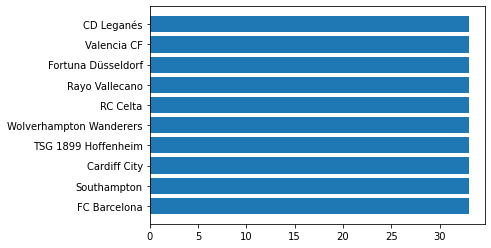

In [15]:
plt.barh(club.index, club.values)

In [16]:
lclub = df['Club'].value_counts().tail(10)
lclub

Cruzeiro                20
Grêmio                  20
Sport Club do Recife    20
Tromsø IL               20
Fluminense              20
Vitória                 20
Bahia                   20
Sligo Rovers            19
Limerick FC             19
Derry City              18
Name: Club, dtype: int64

<BarContainer object of 10 artists>

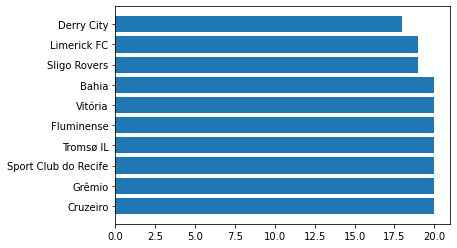

In [17]:
plt.barh(lclub.index, lclub.values)

In [18]:
barc = df[df['Club']=='FC Barcelona']
round(barc.Age.mean())

24

In [19]:
age = df.groupby('Club', as_index=False)['Age'].mean()
age.head(10)

,Club,Age
0,SSV Jahn Regensburg,25.655172
1,1. FC Heidenheim 1846,24.000000
2,1. FC Kaiserslautern,23.846154
3,1. FC Köln,24.321429
4,1. FC Magdeburg,24.692308
5,1. FC Nürnberg,23.793103
6,1. FC Union Berlin,25.250000
7,1. FSV Mainz 05,23.687500
8,AC Ajaccio,27.043478
9,AC Horsens,25.000000


In [20]:
youngest_club = age.Age.sort_values(ascending=True).head()
youngest_club.head()


231    20.259259
221    21.423077
83     21.480000
237    21.678571
210    21.807692
Name: Age, dtype: float64

In [21]:
df.iloc[youngest_club.index]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
231,230225,Juiano Mestres,34,Brazil,82,82,Cruzeiro,6500.0,39.0,Right,1.0,2.0,RCB,2018,2021-01-01,5.916667,181.0,12400.0
221,156616,F. Ribéry,35,France,83,83,FC Bayern München,11500.0,72.0,Right,4.0,5.0,LM,2007,2019-01-01,5.583333,159.0,19000.0
83,208421,Saúl,23,Spain,85,90,Atlético Madrid,50500.0,77.0,Left,3.0,3.0,RCM,2013,2026-01-01,6.000000,170.0,107300.0
237,221087,Pau López,23,Spain,82,87,Real Betis,21500.0,21.0,Left,1.0,1.0,GK,2018,2023-01-01,6.166667,170.0,46800.0
210,179783,R. Fährmann,29,Germany,83,84,FC Schalke 04,20000.0,38.0,Right,2.0,1.0,GK,2011,2022-01-01,6.500000,216.0,35500.0


<BarContainer object of 5 artists>

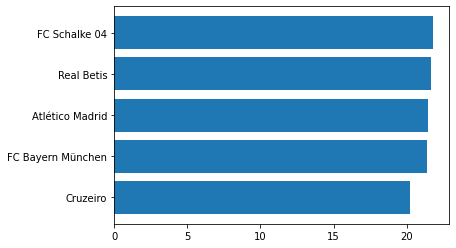

In [22]:
plt.barh(df.iloc[youngest_club.index].Club,youngest_club.values )

In [23]:
highest_wage = df.Wage.sort_values(ascending=False).head(10)
highest_wage


0     565.0
7     455.0
6     420.0
1     405.0
8     380.0
36    355.0
11    355.0
4     355.0
5     340.0
32    340.0
Name: Wage, dtype: float64

<BarContainer object of 10 artists>

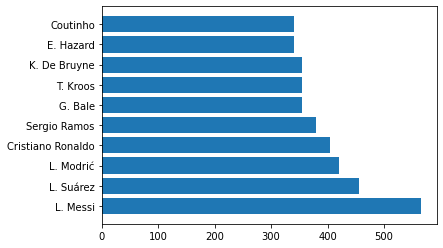

In [24]:
plt.barh(df.iloc[highest_wage.index].Name, highest_wage.values)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Name'>

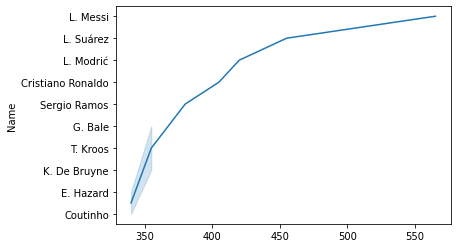

In [25]:
sns.lineplot(highest_wage.values,df.iloc[highest_wage.index].Name)

In [26]:
lowest_wage = df.Wage.sort_values(ascending=True).head(10)
lowest_wage

9104     1.0
13433    1.0
13435    1.0
13436    1.0
13438    1.0
13440    1.0
13441    1.0
13432    1.0
13442    1.0
13444    1.0
Name: Wage, dtype: float64

<BarContainer object of 10 artists>

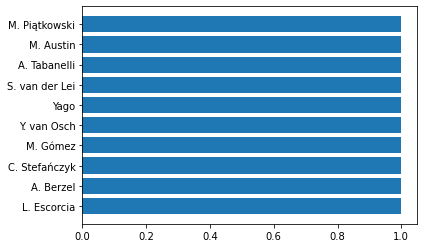

In [27]:
plt.barh(df.loc[lowest_wage.index].Name, lowest_wage.values)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Preferred Foot', ylabel='count'>

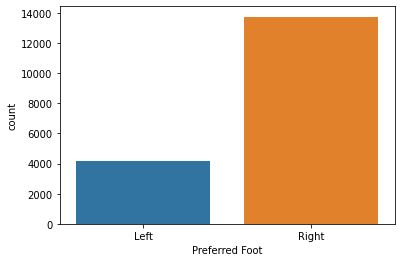

In [28]:
sns.countplot(df['Preferred Foot'])

In [29]:
tallest_player = df['Height'].sort_values(ascending=False).head(8)
tallest_player


11614    6.750000
17927    6.750000
4281     6.666667
16923    6.666667
17920    6.666667
11403    6.666667
4189     6.666667
17694    6.666667
Name: Height, dtype: float64

<BarContainer object of 8 artists>

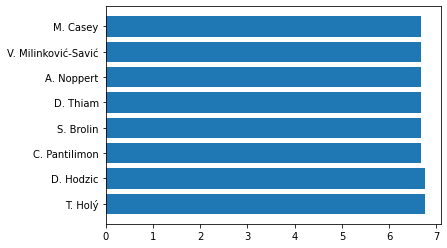

In [30]:
plt.barh(df.loc[tallest_player.index].Name, tallest_player.values)

In [31]:
shortest_player = df['Height'].sort_values(ascending=True).head(8)
shortest_player

6584     5.083333
6275     5.083333
17157    5.083333
2768     5.166667
2493     5.166667
5828     5.166667
8536     5.166667
1340     5.166667
Name: Height, dtype: float64

<BarContainer object of 8 artists>

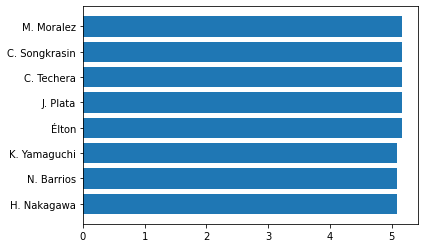

In [32]:
plt.barh(df.loc[shortest_player.index].Name, shortest_player.values)

In [33]:
# comparison of top 8 shortest and longest player
df1 = pd.concat([shortest_player, tallest_player])
df1.head()

6584     5.083333
6275     5.083333
17157    5.083333
2768     5.166667
2493     5.166667
Name: Height, dtype: float64

<BarContainer object of 16 artists>

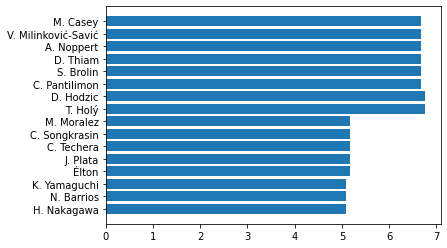

In [34]:
plt.barh(df.loc[df1.index].Name, df1.values )

In [35]:
wage = df.groupby('Club', as_index=False)['Wage'].mean()
wage

,Club,Wage
0,SSV Jahn Regensburg,4.241379
1,1. FC Heidenheim 1846,4.464286
2,1. FC Kaiserslautern,1.692308
3,1. FC Köln,13.285714
4,1. FC Magdeburg,4.884615
...,...,...
646,Zagłębie Sosnowiec,1.080000
647,Çaykur Rizespor,6.433333
648,Örebro SK,1.481481
649,Östersunds FK,2.045455


In [36]:
df4= df[df['Preferred Foot']=="Left"]
df4.Club.value_counts()

Deportivo de La Coruña        15
FC Barcelona                  12
Sheffield Wednesday           12
Manchester City               12
UD Almería                    12
                              ..
Gamba Osaka                    2
Beijing Sinobo Guoan FC        2
Guizhou Hengfeng FC            2
GFC Ajaccio                    2
Shandong Luneng TaiShan FC     1
Name: Club, Length: 651, dtype: int64

In [37]:
df5 =  df4.Club.value_counts().head(8)
df5

Deportivo de La Coruña    15
FC Barcelona              12
Sheffield Wednesday       12
Manchester City           12
UD Almería                12
Deportivo Toluca          12
Charlton Athletic         12
RCD Mallorca              12
Name: Club, dtype: int64

<BarContainer object of 8 artists>

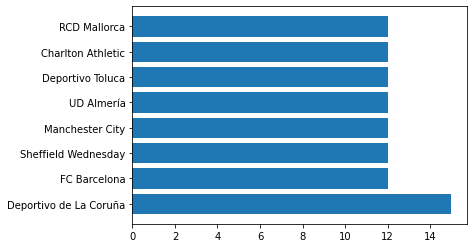

In [38]:
plt.barh(df5.index, df5.values)

<BarContainer object of 8 artists>

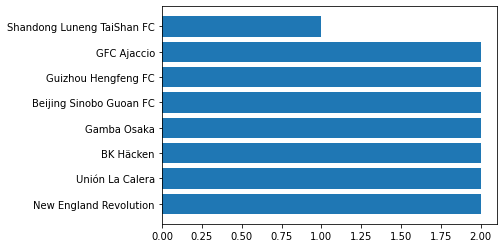

In [39]:
df6 = df4.Club.value_counts().tail(8)
plt.barh(df6.index, df6.values)

In [40]:
right_foot = df[df['Preferred Foot']=="Right"]
right_foot.Club.value_counts()

Chelsea                29
Gamba Osaka            28
TSG 1899 Hoffenheim    28
Southampton            28
V-Varen Nagasaki       28
                       ..
Internacional          12
Atlético Mineiro       12
Atlético Paranaense    12
Derry City             11
Vitória                10
Name: Club, Length: 651, dtype: int64

In [41]:
right_foot_most = right_foot.Club.value_counts().head(8)
right_foot_most

Chelsea                29
Gamba Osaka            28
TSG 1899 Hoffenheim    28
Southampton            28
V-Varen Nagasaki       28
Liverpool              27
Montreal Impact        27
Fenerbahçe SK          27
Name: Club, dtype: int64

<BarContainer object of 8 artists>

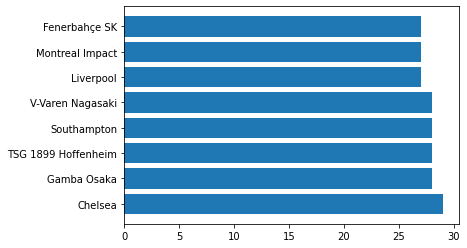

In [42]:
plt.barh(right_foot_most.index, right_foot_most.values)

In [43]:
right_foot_least = right_foot.Club.value_counts().tail(8)
right_foot_least

Botafogo               13
Tromsø IL              13
Bahia                  13
Internacional          12
Atlético Mineiro       12
Atlético Paranaense    12
Derry City             11
Vitória                10
Name: Club, dtype: int64

<BarContainer object of 8 artists>

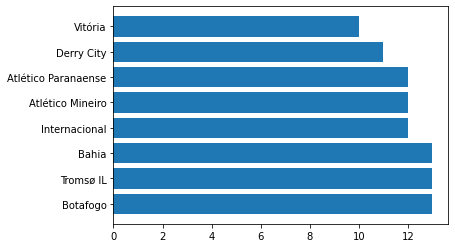

In [44]:
plt.barh(right_foot_least.index, right_foot_least.values)

In [45]:
International_Reputation = df['International Reputation'].value_counts()
International_Reputation

1.0    16298
2.0     1245
3.0      307
4.0       51
5.0        6
Name: International Reputation, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='International Reputation', ylabel='count'>

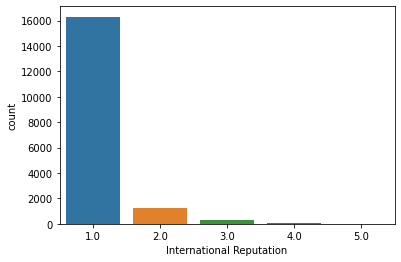

In [46]:
sns.countplot(df['International Reputation'])

In [47]:
df10 = df['International Reputation'].astype(int)
df11 = df
df11.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [48]:
df11['International Reputation']= df10


In [49]:
df11.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [50]:
high_reputation = df11[df11['International Reputation']==5]
high_reputation

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000.0,455.0,Right,5,3.0,RS,2014,2021-01-01,6.000000,190.0,164000.0
22,167495,M. Neuer,32,Germany,89,89,FC Bayern München,38000.0,130.0,Right,5,1.0,GK,2011,2021-01-01,6.333333,203.0,62700.0
109,41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,14000.0,15.0,Right,5,5.0,RS,2018,2022-01-01,6.416667,209.0,21000.0


<BarContainer object of 6 artists>

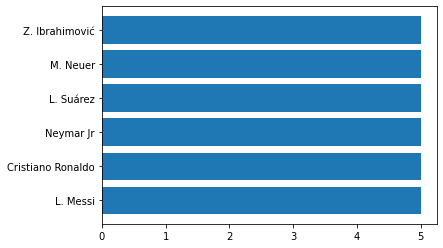

In [51]:
plt.barh(high_reputation['Name'],high_reputation['International Reputation'])

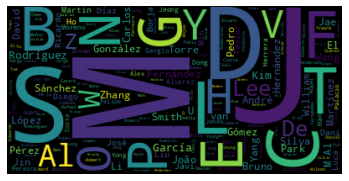

In [52]:
from wordcloud import WordCloud
text = " ".join(review for review in df.Name)
wordcloud = WordCloud(background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
df.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [54]:
average_reputation = df.groupby('Club', as_index=False)['International Reputation'].mean()
average_reputation

,Club,International Reputation
0,SSV Jahn Regensburg,1.000000
1,1. FC Heidenheim 1846,1.000000
2,1. FC Kaiserslautern,1.000000
3,1. FC Köln,1.321429
4,1. FC Magdeburg,1.038462
...,...,...
646,Zagłębie Sosnowiec,1.000000
647,Çaykur Rizespor,1.000000
648,Örebro SK,1.000000
649,Östersunds FK,1.000000


In [55]:
avg = average_reputation['International Reputation'].sort_values(ascending=False).head(10)
avg

326    2.520000
214    2.517241
212    2.242424
435    2.233333
315    2.166667
398    2.160000
134    2.121212
382    2.111111
470    2.090909
375    2.090909
Name: International Reputation, dtype: float64

In [56]:
avg.index

Int64Index([326, 214, 212, 435, 315, 398, 134, 382, 470, 375], dtype='int64')

<BarContainer object of 10 artists>

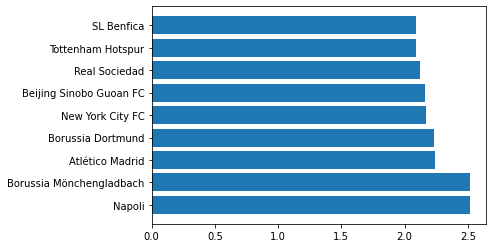

In [57]:
plt.barh(df.loc[avg.index].Club,avg.values)

In [58]:
position = df['Position'].value_counts().head(10)
position

ST     2130
GK     1989
CB     1751
CM     1377
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
CDM     936
Name: Position, dtype: int64

<BarContainer object of 10 artists>

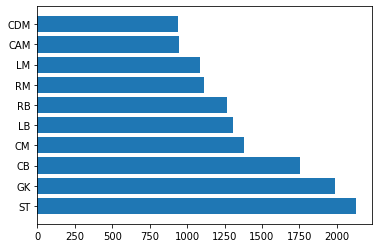

In [59]:
plt.barh(position.index,position.values)